In [187]:
import pandas as pd

data_ssd = {
    'kapasitas': [128, 256, 512, 1024, 2048],
    'harga': [225000, 345000, 555000, 985000, 1800000]
}

data_ssd_df = pd.DataFrame(data_ssd)
data_ssd_df

,kapasitas,harga
0,128,225000
1,256,345000
2,512,555000
3,1024,985000
4,2048,1800000


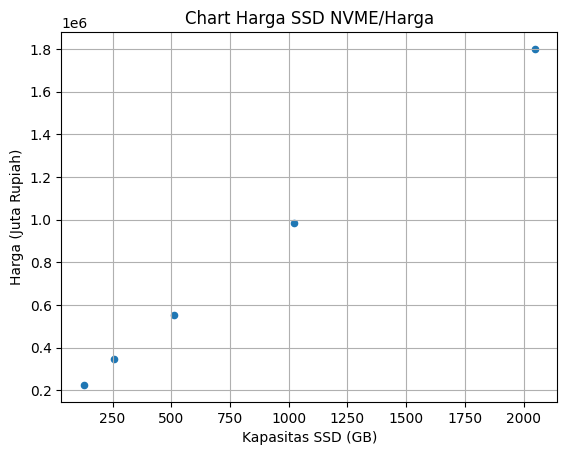

In [188]:
# Visualisasi Data

import matplotlib.pyplot as plt

data_ssd_df.plot(kind='scatter', x='kapasitas', y='harga')

plt.title('Chart Harga SSD NVME/Harga')
plt.xlabel('Kapasitas SSD (GB)')
plt.ylabel('Harga (Juta Rupiah)')
plt.grid(True)
plt.show()

In [189]:
# Penyesuaian Dataset

import numpy as np

x = np.array(data_ssd_df['kapasitas'])
y = np.array(data_ssd_df['harga'])

print(f'x : {x}')
print(f'y : {y}')

x = x.reshape(-1, 1)
x.shape

x

x : [ 128  256  512 1024 2048]
y : [ 225000  345000  555000  985000 1800000]


array([[ 128],
       [ 256],
       [ 512],
       [1024],
       [2048]], dtype=int64)

In [190]:
# Training Simple Linear Regression Model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [191]:
# Visualisasi Linear Regression Model

x_visual = np.linspace(min(x), max(x), 100).reshape(-1, 1)
y_visual = model.predict(x_visual)

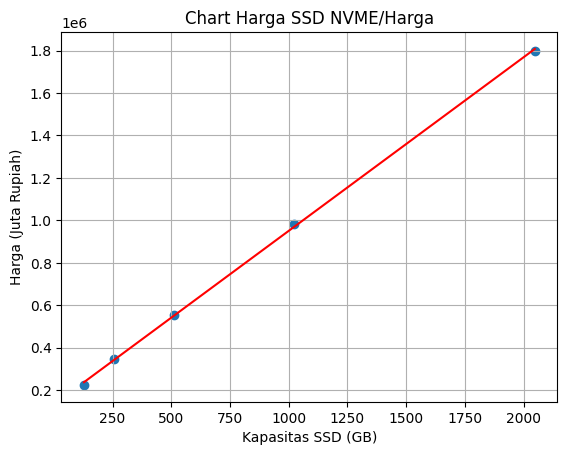

In [192]:
plt.scatter(x,y)
plt.plot(x_visual, y_visual, '-r')

plt.title('Chart Harga SSD NVME/Harga')
plt.xlabel('Kapasitas SSD (GB)')
plt.ylabel('Harga (Juta Rupiah)')
plt.grid(True)
plt.show()

In [193]:
print(f'intercept : {model.intercept_}')
print(f'slope     : {model.coef_}')

intercept : 133125.0
slope     : [817.63482863]


In [194]:
# Mencari nilai slope

# beta = cov(x,y) / var(x)

print(f'x         : \n {x}')
print(f'x Flatten : {x.flatten()}\n')
print(f'y         : {y}')

x         : 
 [[ 128]
 [ 256]
 [ 512]
 [1024]
 [2048]]
x Flatten : [ 128  256  512 1024 2048]

y         : [ 225000  345000  555000  985000 1800000]


In [195]:
# Variance 

variance_x = np.var(x.flatten(), ddof=1)
print(f'variance : {variance_x}')

variance : 609484.8000000002


In [196]:
# Covariance

np.cov(x.flatten(), y)

array([[6.094848e+05, 4.983360e+08],
       [4.983360e+08, 4.075700e+11]])

In [197]:
covariance_xy = np.cov(x.flatten(), y)[0][1]
print(f'covariance : {covariance_xy}')

covariance : 498336000.0


In [198]:
# Slope 

slope = covariance_xy / variance_x

print(f'Slope : {slope}')

Slope : 817.6348286290321


In [199]:
# Mencari nilai intercept

# alpha = y(bar) - beta x(bar)

intercept = np.mean(y) - slope * np.mean(x)

print(f'intercept : {intercept}')

intercept : 133125.00000000012


In [200]:
# Prediksi Harga SSD

kapasitas_ssd = np.array([250, 500, 4096]).reshape(-1, 1)
kapasitas_ssd

array([[ 250],
       [ 500],
       [4096]])

In [201]:
prediksi_harga = model.predict(kapasitas_ssd)
prediksi_harga

array([ 337533.70715726,  541942.41431452, 3482157.25806452])

In [202]:
for kapasitas, harga in zip(kapasitas_ssd, prediksi_harga):
    print(f'Kapasitas: {kapasitas}, Prediksi Harga: {harga}')

Kapasitas: [250], Prediksi Harga: 337533.70715725806
Kapasitas: [500], Prediksi Harga: 541942.4143145161
Kapasitas: [4096], Prediksi Harga: 3482157.258064516


In [203]:
# Training Dataset
x_train = np.array([128, 256, 512, 1024, 2048]).reshape(-1, 1)
y_train = np.array([225000, 345000, 555000, 985000, 1800000])

# Testing Dataset
x_test = np.array([180, 220, 260, 400, 600, 800, 1500]).reshape(-1, 1)
y_test = np.array([270000, 310000, 350000, 450000, 600000, 750000, 1200000])

In [204]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [205]:
# Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-Squared (R2)

from sklearn.metrics import r2_score

y_prediction = model.predict(x_test)
r_squared = r2_score(y_test, y_prediction)

print(f'R-Squared : {r_squared}')

R-Squared : 0.9574667329104225


In [206]:
# Mencari nilai R-Squared (R2)

# R2 = 1 - (SSres) / (SStot)
# SSres = for i = 1 to n (yi - f(xi)2)
# SStot = for i = 1 to n (yi - y(bar))2

ss_res = sum([(y_i - model.predict(x_i.reshape(-1,1))[0])**2 for x_i, y_i in zip(x_test, y_test)])

print(f'ss_res : {ss_res}')

ss_res : 27650269316.83304


In [207]:
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y) ** 2 for y_i in y_test])

print(f'ss_tot : {ss_tot}')

ss_tot : 650085714285.7142


In [208]:
manual_r2 = 1 - (ss_res / ss_tot)
print(f'R-Squared : {manual_r2}')

R-Squared : 0.9574667329104225
